### 목표
- 0~9까지의 손글씨 이미지 데이터를 분류하는 신경망 모델을 만들어보자.
- 중간층 활성화 함수와 최적화 함수를 변화시켜가며 결과를 비교해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# keras에서 지원하는 딥러닝 학습용 패 이미지 데이터 임포트
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# 모든 컬럼 표시
pd.set_option('display.max_columns',None)

In [3]:
data = fashion_mnist.load_data()
data

4422102/4422102 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
len(data)

2

In [5]:
# 데이터가 3차원 배열로 크게는 train, test로 나뉘어져 있고, 각 train, test 안에 문제와 정답으로 한 번 더 나뉘어져 있음
(X_train, y_train),(X_test,y_test) = data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# 이미ㅣ라는 2차원 데이터를 다루기 때문에 shape의 형태는 3칸이 나오게됌
# (데이터의 수, 세로픽셀수, 가로픽셀수)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 정답데이터 원핫 인코딩
- pd.getdummies : 판다스 지원해주는 원핫인코딩
- to_categorical : keras에서 지원해주는 원핫인코딩

In [6]:
pd.get_dummies(y_train)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,1,0,0,0,0
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,1,0,0,0,0,0,0
59998,1,0,0,0,0,0,0,0,0,0


In [7]:
from tensorflow.keras.utils import to_categorical
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

### 활성화 함수, 최적화 함수 별 비교
- 1. 중간층 활성화 함수 :sigmoid, 최적화 함수 : SGD
- 2. 중간층 활성화 함수 : relu, 최적화 함수 : SGD
- 3. 중간층 활성화 함수 : relu, 최적화 함수 : Adam
  - 각각의 신경망을 설계하고 결과를 비교해보세요

- 인공신경망에는 2차원인 이미지데이터를 한 번에 넣을 수 없기 때문에 데이터의 차원을 전부 1차원으로 변경시켜준 뒤, 학습시켜야함.

### 신경망 모델링
- 직접 모델링을 해보자

In [ ]:
# 입력되는 특성 수
# 출력층 활성화함수, 뉴런수
# lossg함수
# 최적화함(SGD,ADMAS 둘 다 사용해보)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

### 과대적합을 확인하기 위해 train 데이터에서 validation 데이터를 분리해서 학습시 같이 출력해보자.

In [17]:
# 무조건 train, test만 나눠주는게 아니라 데이터를 일정 비율로 랜덤하게 나눠주는 기능을 갖고 있음.
from sklearn.model_selection import train_test_split

In [13]:
print(X_train.shape)
print(X_val.shape)
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)

(45000, 28, 28)
(15000, 28, 28)
(45000, 10)
(15000, 10)


In [31]:
# SGD 학습률(learning rate) 을 줄여서 좀 더 안정적이고 정확하게 학습시켜보자
from tensorflow.keras.optimizers import SGD

In [20]:
# 1. 신경망 구조 설계
model1 = Sequential() # 신경망 뼈대 설정
model2 = Sequential()
model3 = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함(들어 자극(데이터)에 대해서 응답 여부를 결정하는 함)
model1.add(Flatten(input_shape=(28,28)))
model2.add(Flatten(input_shape=(28,28)))
model3.add(Flatten(input_shape=(28,28)))

model1.add(Dense(250, activation='sigmoid'))
model2.add(Dense(250, activation='sigmoid'))
model3.add(Dense(250, activation='sigmoid'))
# 중간층
model1.add(Dense(100, activation='sigmoid'))
model1.add(Dense(70, activation='sigmoid'))
model1.add(Dense(50, activation='sigmoid'))

model2.add(Dense(100, activation='relu'))
model2.add(Dense(70, activation='relu'))
model2.add(Dense(50, activation='relu'))

model3.add(Dense(100, activation='relu'))
model3.add(Dense(70, activation='relu'))
model3.add(Dense(50, activation='relu'))


# 출력층
# 출력층은 문제의 종류에 따라서 고정(2진분류 문제는 출력층 뉴런 개수 1개, 활성화함수는 sigmoid로 고)
model1.add(Dense(10, activation='softmax'))
model2.add(Dense(10, activation='softmax'))
model3.add(Dense(10, activation='softmax'))

# 설계된 신경망의 정보를 요약해서 출
model1.summary()
model2.summary()
model3.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 250)               196250    
                                                                 
 dense_34 (Dense)            (None, 100)               25100     
                                                                 
 dense_35 (Dense)            (None, 70)                7070      
                                                                 
 dense_36 (Dense)            (None, 50)                3550      
                                                                 
 dense_43 (Dense)            (None, 10)                510       
                                                                 
Total params: 232,480
Trainable params: 232,480
Non-t

In [32]:
# 2. 신경망 학습 및 평가방 설정
# binary_crossentrophy : 2진부류에 사용하는 손실 함수
#-> 오차의 평균을 구하는 것은 mse와 같지만, 0~1 사이값(분류를 편하게 하기 위해)으로 변환 평균오차를 구해
model1.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.001),
              metrics=['acc'])

model2.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.002),
              metrics=['acc'])

model3.compile(loss='categorical_crossentropy',
             optimizer=SGD(learning_rate=0.004),
              metrics=['acc'])

In [33]:
h1 = model1.fit(X_train,y_train_one_hot,
                batch_size = 128,
                epochs=30,
                validation_data = (X_val,y_val_one_hot)  # 검증용 데이터셋 추가
                )
h2 = model2.fit(X_train,y_train_one_hot,
                batch_size = 128,
                epochs=30,
                validation_data = (X_val,y_val_one_hot)  # 검증용 데이터셋 추가
                )
h3 = model3.fit(X_train,y_train_one_hot,
                batch_size = 128,
                epochs=30,
                validation_data = (X_val,y_val_one_hot)  # 검증용 데이터셋 추가
                )

Epoch 1/30
352/352 [==============================] - 3s 5ms/step - loss: 0.4816 - acc: 0.8373 - val_loss: 0.4921 - val_acc: 0.8360
Epoch 2/30
352/352 [==============================] - 2s 4ms/step - loss: 0.4573 - acc: 0.8483 - val_loss: 0.4804 - val_acc: 0.8409
Epoch 3/30
352/352 [==============================] - 2s 5ms/step - loss: 0.4465 - acc: 0.8521 - val_loss: 0.4717 - val_acc: 0.8407
Epoch 4/30
352/352 [==============================] - 2s 5ms/step - loss: 0.4387 - acc: 0.8554 - val_loss: 0.4723 - val_acc: 0.8403
Epoch 5/30
352/352 [==============================] - 2s 6ms/step - loss: 0.4356 - acc: 0.8557 - val_loss: 0.4677 - val_acc: 0.8421
Epoch 6/30
352/352 [==============================] - 3s 7ms/step - loss: 0.4312 - acc: 0.8571 - val_loss: 0.4635 - val_acc: 0.8447
Epoch 7/30
352/352 [==============================] - 2s 5ms/step - loss: 0.4283 - acc: 0.8570 - val_loss: 0.4669 - val_acc: 0.8442
Epoch 8/30
352/352 [==============================] - 2s 4ms/step - loss: 0.

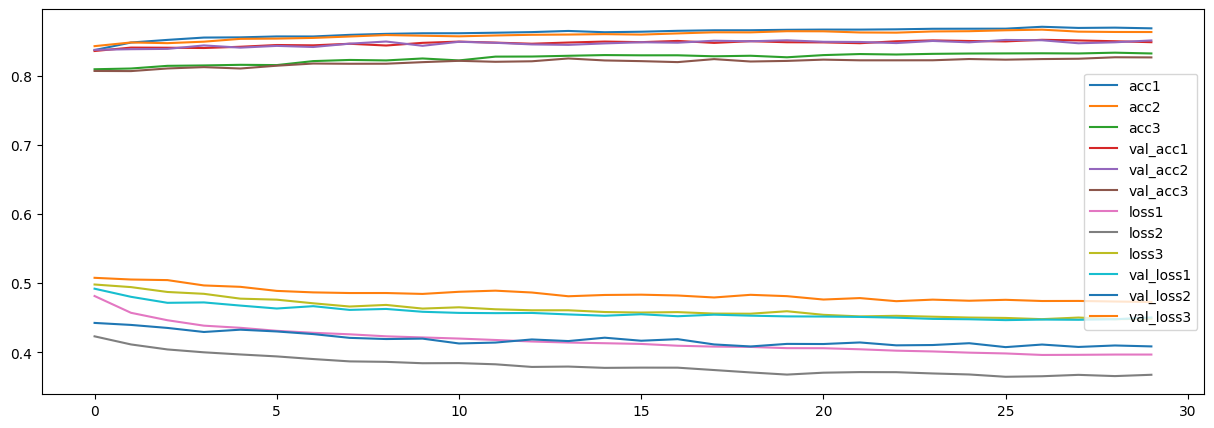

In [34]:
plt.figure(figsize=(15,5))

plt.plot(h1.history['acc'],label='acc1')
plt.plot(h2.history['acc'],label='acc2')
plt.plot(h3.history['acc'],label='acc3')

plt.plot(h1.history['val_acc'],label='val_acc1')
plt.plot(h2.history['val_acc'],label='val_acc2')
plt.plot(h3.history['val_acc'],label='val_acc3')

plt.plot(h1.history['loss'],label='loss1')
plt.plot(h2.history['loss'],label='loss2')
plt.plot(h3.history['loss'],label='loss3')

plt.plot(h1.history['val_loss'],label='val_loss1')
plt.plot(h2.history['val_loss'],label='val_loss2')
plt.plot(h3.history['val_loss'],label='val_loss3')

plt.legend()
plt.show()

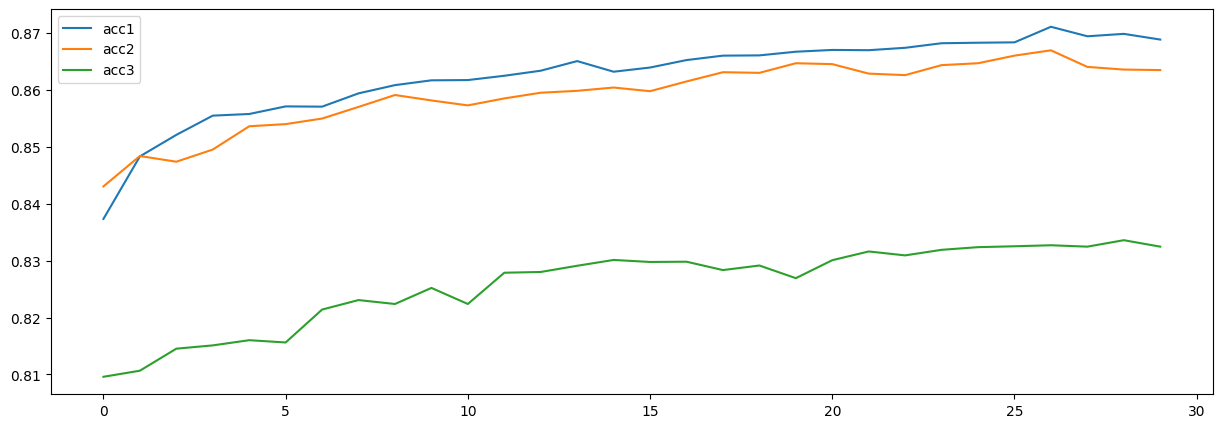

In [35]:
plt.figure(figsize=(15,5))

plt.plot(h1.history['acc'],label='acc1')
plt.plot(h2.history['acc'],label='acc2')
plt.plot(h3.history['acc'],label='acc3')
plt.legend()
plt.show()

In [26]:
model1.evaluate(X_train,y_train_one_hot)
model2.evaluate(X_train,y_train_one_hot)
model3.evaluate(X_train,y_train_one_hot)

1407/1407 [==============================] - 4s 3ms/step - loss: 0.5053 - acc: 0.8229


[0.5053052306175232, 0.8228889107704163]

### 최적화 모델 찾기
- 모델체크포인트 : 모델저장
- 얼리스탑핑 : 조기힉습중단(과대적합, 시간낭비 방지)

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [37]:
# 1. 모델 저장
# 저장 경로 및 파일명 형태 설정
save_path = '/content/drive/MyDrive/Colab Notebooks/Colab/model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# d : 10진수, 03 -> 0이 3개붙어있는 형태의 자리수 (001,002,003,...)
# f : 소수점 형태, .4 -> 소수점 4자리까지 형태의 자리수(0.0001,0.0002,0.0003,....)
# hdf5 : 저장되는 모델의 파일의 확장자명

f_mckp = ModelCheckpoint(filepath=save_path,  # 파일 경로 설정
                         monitor='val_Acc',   # 해당 값을 기준으로 파일을 저장
                         save_best_ony=True,  # Monitor 값이 가장 최고점 혹은 최저점을 갱신했을 경우 모델을 저장
                         mode='max',          # save_best_only가 True일 경우 갱신 값의 최대, 최소를 결정
                         verbose=1            # 모델 개선 및 저장 메시지를 출력
                         )

In [46]:
# 2. 학습 조기 중단
f_early=EarlyStopping(monitor='val_acc',
                      # monitor의 값 개선을 몇 번이나 기다려줄지를 결정
                      patience=5
                      )

# ->  모델 학습 시 val_Acc가 5번의 epoch를 돌 동안 개선되지 않으면 학습을 중단시키자

In [47]:
# 1. 신경망 구조 설계
model4 = Sequential() # 신경망 뼈대 설정


# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화함(들어 자극(데이터)에 대해서 응답 여부를 결정하는 함)
model4.add(Flatten(input_shape=(28,28)))


model4.add(Dense(250, activation='sigmoid'))

# 중간층
model4.add(Dense(100, activation='relu'))
model4.add(Dense(70, activation='relu'))
model4.add(Dense(50, activation='relu'))


# 출력층
# 출력층은 문제의 종류에 따라서 고정(2진분류 문제는 출력층 뉴런 개수 1개, 활성화함수는 sigmoid로 고)
model4.add(Dense(10, activation='softmax'))


# 설계된 신경망의 정보를 요약해서 출
model4.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_51 (Dense)            (None, 250)               196250    
                                                                 
 dense_52 (Dense)            (None, 100)               25100     
                                                                 
 dense_53 (Dense)            (None, 70)                7070      
                                                                 
 dense_54 (Dense)            (None, 50)                3550      
                                                                 
 dense_55 (Dense)            (None, 10)                510       
                                                                 
Total params: 232,480
Trainable params: 232,480
Non-t

In [48]:
model4.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc'])

In [51]:
h4 = model4.fit(X_train,y_train_one_hot,
                batch_size = 128,
                epochs=30,
                validation_split = 0.2,  # 검증용 데이터셋 추가
                callbacks=[f_mckp,f_early]
                )

Epoch 1/30
279/282 [============================>.] - ETA: 0s - loss: 0.6649 - acc: 0.7392
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/Colab/model/FashionModel_001_0.7219.hdf5
282/282 [==============================] - 2s 5ms/step - loss: 0.6650 - acc: 0.7390 - val_loss: 0.6789 - val_acc: 0.7219
Epoch 2/30
274/282 [============================>.] - ETA: 0s - loss: 0.6512 - acc: 0.7452
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/Colab/model/FashionModel_002_0.7383.hdf5
282/282 [==============================] - 2s 6ms/step - loss: 0.6522 - acc: 0.7444 - val_loss: 0.7106 - val_acc: 0.7383
Epoch 3/30
279/282 [============================>.] - ETA: 0s - loss: 0.6545 - acc: 0.7450
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/Colab/model/FashionModel_003_0.7464.hdf5
282/282 [==============================] - 2s 6ms/step - loss: 0.6545 - acc: 0.7449 - val_loss: 0.6483 - val_acc: 0.7464
Epoch 4/30
281/282 [============================>

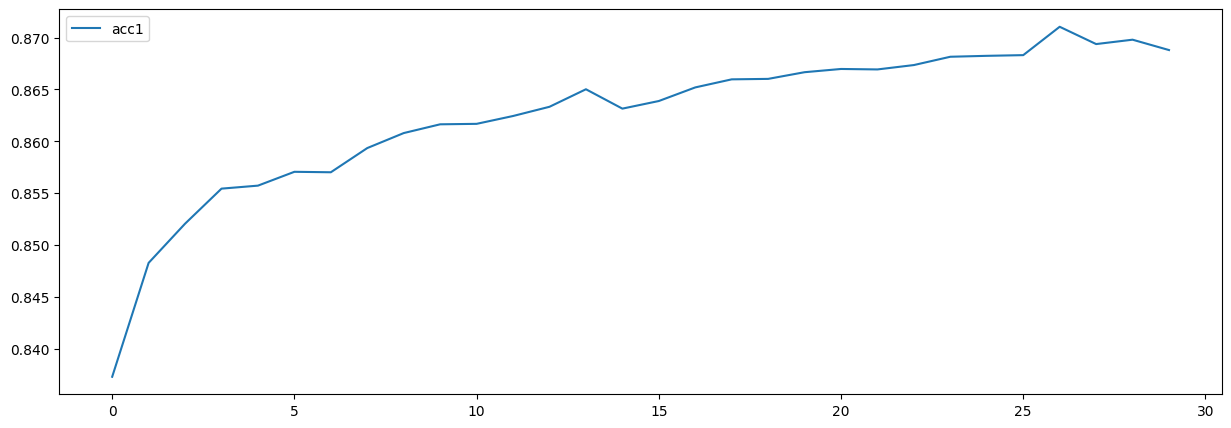

In [52]:
plt.figure(figsize=(15,5))

plt.plot(h1.history['acc'],label='acc1')

plt.legend()
plt.show()

In [55]:
# 저장된 모델 로드하기
from tensorflow.keras.models import load_model

In [56]:
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/Colab/model/FashionModel_024_0.7722.hdf5')

In [58]:
best_model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.6322 - acc: 0.7665


[0.6322044730186462, 0.7664999961853027]